# House Price Prediction

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset (day.csv) present in the same path.
HouseData = pd.read_csv("./train.csv",low_memory=False)
HouseData.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
def Fetch_Number_of_Columns(DataSet):
    Number_of_Columns = len(DataSet.columns)
    return Number_of_Columns 

def Fetch_Number_of_Rows(DataSet):
    Number_of_rows = len(DataSet.index)
    return Number_of_rows

In [4]:
# Get the number of Rows & Columns in the Dataset
print("Number of Columns in the dataset : {Num_Cols}".format(Num_Cols = Fetch_Number_of_Columns(HouseData)))
print("Number of Rows in the dataset : {Num_Rows}".format(Num_Rows = Fetch_Number_of_Rows(HouseData)))

Number of Columns in the dataset : 81
Number of Rows in the dataset : 1460


In [5]:
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
HouseData.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# Get the only the numeric values
HouseData_Numeric = HouseData.select_dtypes(include=['float64', 'int64'])
HouseData_Numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [8]:
HouseData_Numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
# From the Data definition and the csv file, below features can be dropped off still it can be considered as categorical
# MSSubClass is a numeric variable where the values are based on the certain categories

HouseData_Numeric.MSSubClass

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

In [10]:
# dropping the columns we want to treat as categorical variables
HouseData_Numeric = HouseData_Numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1)
HouseData_Numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,2198,836,192,84,0,0,0,0,0,250000


In [11]:
HouseData_Numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,421.610009,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,1.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,1314.100000,96.000000,14381.700000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,...,2158.300000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,278000.000000
95%,1387.050000,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,...,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
99%,1445.410000,141.000000,37567.640000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,...,3123.480000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000


In [12]:
# correlation matrix
Correlation = HouseData_Numeric.corr()

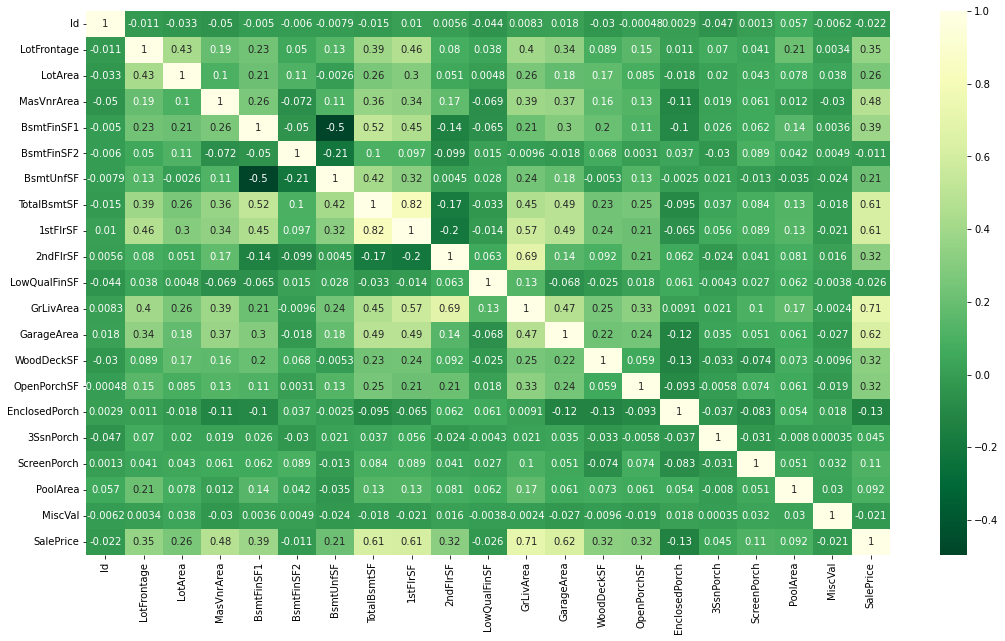

In [13]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(18,10))

# heatmap
sns.heatmap(Correlation, annot=True,cmap = 'YlGn_r')
plt.show()

In [14]:
HouseData.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
# Checking the percentage of missing values
round(100*(HouseData.isnull().sum()/len(HouseData.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [16]:
HouseData['Alley'].fillna('No Alley', inplace=True)

In [17]:
HouseData['MasVnrType'].fillna('None', inplace=True) 
HouseData['FireplaceQu'].fillna('No Fireplace', inplace=True)
HouseData['PoolQC'].fillna('No Pool', inplace=True) 
HouseData['Fence'].fillna('No Fence', inplace=True) 
HouseData['MasVnrArea'].fillna(0, inplace=True) 
HouseData['LotFrontage'].fillna(0, inplace=True) 
HouseData['GarageType'].fillna('No Garage', inplace=True) 
HouseData['GarageFinish'].fillna('No Garage', inplace=True) 
HouseData['GarageQual'].fillna('No Garage', inplace=True) 
HouseData['GarageCond'].fillna('No Garage', inplace=True) 
HouseData= HouseData.drop('MiscFeature', axis=1)

In [18]:
HouseData.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [19]:
#converting year to number of years
HouseData['YearBuilt'] = 2023 - HouseData['YearBuilt']
HouseData['YearRemodAdd'] = 2023 - HouseData['YearRemodAdd']
HouseData['GarageYrBlt'] = 2023 - HouseData['GarageYrBlt']
HouseData['YrSold'] = 2023 - HouseData['YrSold']

In [20]:
#converting from int data type to object to treat the variables as categorical variables
HouseData['MSSubClass'] = HouseData['MSSubClass'].astype('object')
HouseData['OverallQual'] = HouseData['OverallQual'].astype('object')
HouseData['OverallCond'] = HouseData['OverallCond'].astype('object')
HouseData['BsmtFullBath'] = HouseData['BsmtFullBath'].astype('object')
HouseData['BsmtHalfBath'] = HouseData['BsmtHalfBath'].astype('object')
HouseData['FullBath'] = HouseData['FullBath'].astype('object')
HouseData['HalfBath'] = HouseData['HalfBath'].astype('object')
HouseData['BedroomAbvGr'] = HouseData['BedroomAbvGr'].astype('object')
HouseData['KitchenAbvGr'] = HouseData['KitchenAbvGr'].astype('object')
HouseData['TotRmsAbvGrd'] = HouseData['TotRmsAbvGrd'].astype('object')
HouseData['Fireplaces'] = HouseData['Fireplaces'].astype('object')
HouseData['GarageCars'] = HouseData['GarageCars'].astype('object')

In [21]:
HouseData_Processed = HouseData

In [22]:
# List of variables to map

varlist1 =  ['Street']

# Defining the map function
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})

# Applying the function to the Lead list
HouseData_Processed[varlist1] = HouseData_Processed[varlist1].apply(binary_map)

In [23]:

varlist2 =  ['Utilities']

# Defining the map function
def binary_map(x):
    return x.map({'AllPub': 1, "NoSeWa": 0})

# Applying the function to the Lead list
HouseData_Processed[varlist2] = HouseData_Processed[varlist2].apply(binary_map)

In [24]:
varlist3 =  ['CentralAir']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the Lead list
HouseData_Processed[varlist3] = HouseData_Processed[varlist3].apply(binary_map)

In [25]:
# split into X and y
X = HouseData_Processed.drop([ 'Id'], axis=1)

In [26]:
HouseData_categorical = X.select_dtypes(include=['object'])
HouseData_categorical.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [27]:
# convert into dummies
HouseData_Dummies= pd.get_dummies(HouseData_categorical, drop_first=True)
HouseData_Dummies.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# drop categorical variables 
HouseData_Processed = HouseData_Processed.drop(list(HouseData_categorical.columns), axis=1)

In [29]:
HouseData_Processed = pd.concat([HouseData_Processed, HouseData_Dummies], axis=1)

In [30]:
Data_Shape = HouseData_Processed.shape

In [31]:
import math
Test_Data_len = math.floor(Data_Shape[0]*0.4)
Train_Data_len = Data_Shape[0]  - Test_Data_len
print(Test_Data_len,Train_Data_len)

584 876


In [32]:
Test_Data = HouseData_Processed.tail(Test_Data_len)
Train_Data = HouseData_Processed.head(Train_Data_len)

In [33]:
X = Train_Data
y = np.log(X.SalePrice)
X = X.drop("SalePrice",1) # take out the target variable

C:\Users\E878019\AppData\Local\Temp\ipykernel_24580\3150229331.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop("SalePrice",1) # take out the target variable


In [34]:
Test_Data = Test_Data.fillna(Test_Data.interpolate())
X = X.fillna(X.interpolate())

In [35]:
Test_Data = Test_Data.drop("SalePrice",1) # take out the target variable

C:\Users\E878019\AppData\Local\Temp\ipykernel_24580\565327234.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Test_Data = Test_Data.drop("SalePrice",1) # take out the target variable


In [36]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Test_Data)

StandardScaler()

In [38]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [39]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [40]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-0.09868935706092714


In [42]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009402,0.001498,0.004200,9.844085e-04,0.0001,{'alpha': 0.0001},-0.165473,-0.125674,-0.139203,-0.137750,...,-0.146786,0.016104,28,-0.043243,-0.049759,-0.049775,-0.050743,-0.047147,-0.048133,0.002722
1,0.007801,0.000748,0.002999,6.330139e-04,0.001,{'alpha': 0.001},-0.164529,-0.124876,-0.138940,-0.135744,...,-0.145362,0.015634,27,-0.043269,-0.049831,-0.049787,-0.050850,-0.047223,-0.048192,0.002738
2,0.007200,0.001600,0.003399,4.908572e-04,0.01,{'alpha': 0.01},-0.159013,-0.122830,-0.136528,-0.128510,...,-0.138953,0.013092,26,-0.043486,-0.050357,-0.049960,-0.051437,-0.047961,-0.048640,0.002812
3,0.007202,0.001165,0.003397,4.895129e-04,0.05,{'alpha': 0.05},-0.147009,-0.122982,-0.128924,-0.119326,...,-0.130174,0.009596,25,-0.044475,-0.051582,-0.050774,-0.052815,-0.049693,-0.049868,0.002883
4,0.009525,0.001004,0.004395,4.852117e-04,0.1,{'alpha': 0.1},-0.138808,-0.122435,-0.123406,-0.113912,...,-0.125366,0.008157,24,-0.045621,-0.052653,-0.051517,-0.053936,-0.050855,-0.050917,0.002847
5,0.008771,0.001444,0.017578,2.721041e-02,0.2,{'alpha': 0.2},-0.130361,-0.120709,-0.116929,-0.108184,...,-0.120101,0.007423,23,-0.047705,-0.054329,-0.052798,-0.055412,-0.052212,-0.052491,0.002645
6,0.008999,0.000007,0.004598,4.910114e-04,0.3,{'alpha': 0.3},-0.126117,-0.119253,-0.113369,-0.104877,...,-0.117097,0.007376,22,-0.049184,-0.055576,-0.053982,-0.056465,-0.053067,-0.053655,0.002531
7,0.006797,0.001168,0.003399,7.999422e-04,0.4,{'alpha': 0.4},-0.123773,-0.117986,-0.110844,-0.102526,...,-0.115021,0.007530,21,-0.050302,-0.056635,-0.054954,-0.057302,-0.053719,-0.054582,0.002483
8,0.006200,0.000980,0.002999,7.539457e-07,0.5,{'alpha': 0.5},-0.121974,-0.116815,-0.108944,-0.101040,...,-0.113441,0.007525,19,-0.051205,-0.057500,-0.055779,-0.058031,-0.054285,-0.055360,0.002462
9,0.006401,0.000489,0.002399,4.901155e-04,0.6,{'alpha': 0.6},-0.120623,-0.115714,-0.107391,-0.099923,...,-0.112212,0.007540,17,-0.051944,-0.058260,-0.056457,-0.058711,-0.054779,-0.056030,0.002474


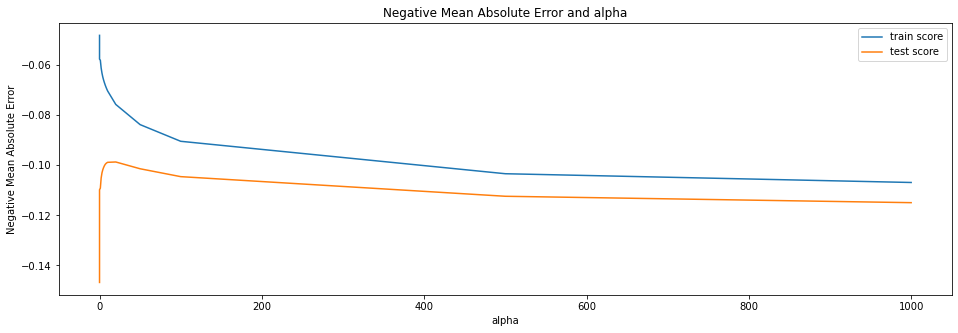

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [44]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.15571146e-05,  2.42774944e-04,  1.28675830e-06,  3.20137012e-02,
        0.00000000e+00, -1.25742223e-03, -2.04217258e-03, -4.12531719e-05,
        2.95452841e-06,  8.83510510e-05, -2.69220642e-05,  6.43835195e-05,
        9.76715295e-02,  7.51625602e-05,  9.45117178e-06,  1.16025181e-04,
        2.00638911e-04,  4.47087267e-04,  3.14493763e-04,  7.21785160e-05,
       -9.31486173e-05,  1.95916567e-04,  1.37527086e-04,  3.31173109e-04,
       -2.79407643e-05,  4.74703772e-06, -7.88495098e-04,  6.01297482e-03,
       -5.83554747e-02, -2.39349959e-02,  8.02687583e-03,  3.41629960e-02,
       -8.53414386e-03,  3.44899414e-02,  3.21606332e-02, -1.67954455e-02,
        1.92572935e-03,  2.70836291e-02, -1.17960300e-02, -3.65199258e-02,
       -2.07274407e-02,  1.26396553e-02,  6.26587303e-02,  9.93720225e-02,
        8.05459249e-02,  4.11268730e-02, -2.80276742e-02, -5.40288987e-02,
        2.59596626e-02,  1.73423406e-02, -1.50042211e-03,  1.06807419e-02,
       -7.27947439e-04,  

In [45]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9471843620173879


In [46]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.082e-02, tolerance: 8.126e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e-01, tolerance: 8.770e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+00, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.088124,0.019579,0.003312,0.000396,0.0001,{'alpha': 0.0001},-0.122640,-0.111543,-0.107857,-0.102497,...,-0.112517,0.007157,2,-0.049011,-0.055377,-0.055291,-0.057743,-0.055582,-0.054601,0.002938
1,0.022005,0.003030,0.003801,0.000401,0.001,{'alpha': 0.001},-0.100340,-0.093239,-0.097945,-0.087388,...,-0.097477,0.007057,1,-0.072519,-0.075771,-0.074885,-0.077023,-0.071768,-0.074393,0.001973
2,0.007998,0.001097,0.003399,0.000489,0.01,{'alpha': 0.01},-0.124619,-0.103575,-0.119798,-0.113152,...,-0.115980,0.007194,3,-0.106395,-0.110307,-0.108837,-0.111500,-0.105819,-0.108572,0.002190
3,0.028000,0.004148,0.003399,0.000489,0.05,{'alpha': 0.05},-0.124155,-0.108320,-0.122342,-0.115885,...,-0.118519,0.005809,10,-0.107649,-0.115037,-0.112473,-0.116327,-0.109580,-0.112213,0.003248
4,0.026196,0.004446,0.003400,0.000491,0.1,{'alpha': 0.1},-0.123692,-0.107474,-0.122628,-0.114880,...,-0.118077,0.006133,9,-0.107657,-0.115108,-0.112476,-0.116226,-0.109478,-0.112189,0.003249
5,0.019800,0.004069,0.003599,0.000801,0.2,{'alpha': 0.2},-0.123363,-0.105827,-0.122018,-0.112872,...,-0.117144,0.006767,7,-0.107363,-0.114953,-0.112234,-0.115946,-0.109299,-0.111959,0.003260
6,0.019000,0.005693,0.003399,0.000801,0.3,{'alpha': 0.3},-0.123241,-0.104720,-0.121656,-0.111927,...,-0.116702,0.007231,5,-0.107303,-0.115341,-0.112261,-0.115982,-0.109361,-0.112050,0.003350
7,0.017199,0.006614,0.004401,0.001201,0.4,{'alpha': 0.4},-0.123366,-0.104353,-0.121816,-0.111242,...,-0.116682,0.007590,4,-0.107522,-0.115837,-0.112484,-0.116147,-0.109711,-0.112340,0.003372
8,0.013411,0.004821,0.002397,0.000492,0.5,{'alpha': 0.5},-0.123526,-0.104851,-0.122443,-0.110912,...,-0.117120,0.007797,6,-0.108127,-0.116297,-0.112959,-0.116626,-0.110391,-0.112880,0.003302
9,0.012208,0.004953,0.002399,0.000491,0.6,{'alpha': 0.6},-0.123949,-0.105778,-0.123243,-0.111139,...,-0.117872,0.007897,8,-0.109023,-0.117106,-0.113746,-0.117500,-0.111406,-0.113756,0.003261


In [48]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.082e-02, tolerance: 8.126e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.091e-01, tolerance: 8.770e-03
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+00, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.084800,0.017618,0.003200,3.983769e-04,0.0001,{'alpha': 0.0001},0.760260,0.679213,0.874831,0.882096,...,0.803372,0.075987,3,0.973149,0.971862,0.966524,0.964854,0.965132,0.968304,0.003501
1,0.021794,0.006823,0.004201,3.998105e-04,0.001,{'alpha': 0.001},0.822282,0.800799,0.903051,0.902756,...,0.854120,0.041882,1,0.937471,0.941141,0.930570,0.929540,0.938546,0.935453,0.004578
2,0.009002,0.000005,0.003798,3.989694e-04,0.01,{'alpha': 0.01},0.748819,0.819317,0.849337,0.800111,...,0.808537,0.033741,2,0.857772,0.847181,0.837710,0.836185,0.843557,0.844481,0.007739
3,0.025599,0.003137,0.003200,7.487743e-04,0.05,{'alpha': 0.05},0.746330,0.811788,0.843972,0.775484,...,0.799408,0.034442,9,0.853751,0.834574,0.827275,0.824842,0.833922,0.834873,0.010156
4,0.026000,0.003521,0.003200,7.479976e-04,0.1,{'alpha': 0.1},0.745502,0.813015,0.843332,0.777929,...,0.799921,0.034343,8,0.853004,0.833779,0.826390,0.824413,0.833015,0.834120,0.010118
5,0.020801,0.003817,0.003000,8.944695e-04,0.2,{'alpha': 0.2},0.745767,0.815408,0.842371,0.784693,...,0.801483,0.033361,5,0.851997,0.832573,0.825091,0.823062,0.831225,0.832790,0.010250
6,0.015193,0.004533,0.002999,1.093755e-03,0.3,{'alpha': 0.3},0.745556,0.815737,0.841145,0.789025,...,0.802052,0.032734,4,0.850911,0.830582,0.823418,0.821083,0.829504,0.831100,0.010532
7,0.013198,0.003919,0.003000,6.327871e-04,0.4,{'alpha': 0.4},0.744979,0.814007,0.839866,0.790328,...,0.801418,0.032302,6,0.849391,0.828594,0.821653,0.819299,0.827696,0.829327,0.010632
8,0.013400,0.005067,0.003007,6.329905e-04,0.5,{'alpha': 0.5},0.744036,0.810961,0.838235,0.790750,...,0.800104,0.031853,7,0.847437,0.826480,0.819384,0.817013,0.825702,0.827203,0.010744
9,0.012395,0.004548,0.003006,6.222068e-04,0.6,{'alpha': 0.6},0.742726,0.807388,0.836253,0.790517,...,0.798315,0.031435,10,0.845048,0.824224,0.816611,0.814219,0.823266,0.824674,0.010878


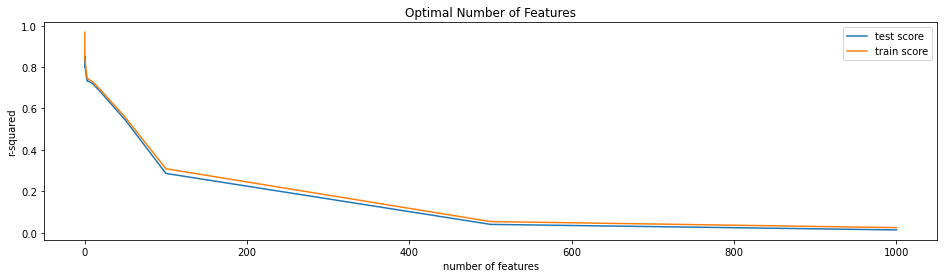

In [50]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [51]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.09747676786397852


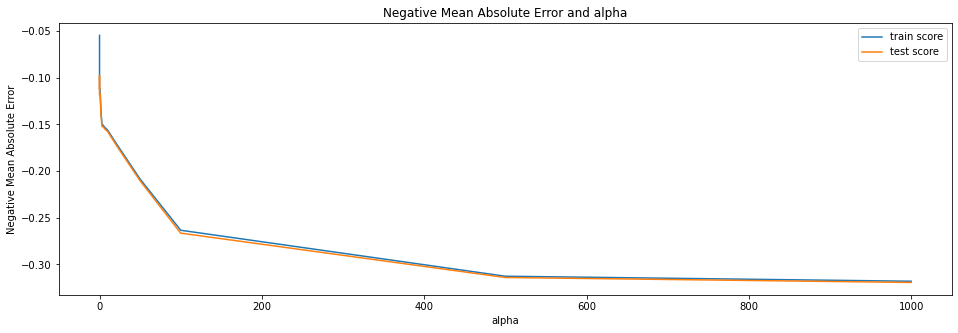

In [52]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [53]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [54]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9601133549007081


In [55]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [56]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8762774682342327


In [57]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.018188185043472114


In [62]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)

lasso.fit(X_train,y_train)
preds = lasso.predict(Test_Data)
final_predictions = np.exp(preds)

In [60]:
alpha = 4

ridge = Ridge(alpha=alpha)

ridge.fit(X_train,y_train)
preds1 = ridge.predict(Test_Data)
final_predictions1 = np.exp(preds1)

In [61]:
final_predictions1

array([ 136965.04344109,  390746.05409453,  140082.73527335,
        140672.77005755,  152157.66949854,  205162.50958768,
        171024.64042096,  150761.45371576,  114558.47110015,
        257837.93009768,  175503.74895103,  139286.19413077,
        317858.53260679,  154992.37666834,  130256.63944944,
        167939.34588407,  136160.29028433,  132063.33119628,
        120782.5901608 ,  165500.99415547,   80850.54072372,
        135787.51379301,  439840.47805214,  136686.26459624,
        121605.57658527,  175345.19756199,  180367.2239509 ,
        249746.65459174,  117739.54466064,  118504.79728578,
        295773.95937527,  242037.47178058,  120255.85057528,
        181711.29498174,  178096.15769023,  153543.98936333,
         92789.93712598,  184507.48924151,  169090.93722021,
         89811.29190075,   65916.84696193,  120835.90035938,
        296627.61224432,  186061.24310236,  184021.34159461,
        150547.56246938,  185384.60127996,  200758.62025366,
        215726.5854853 ,